In [1]:
# Author: Alex Zaneratto
# Para utilizar, basta executar o programa na sequência.

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/AZaneratto/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/AZaneratto/assets_signal
    %cd ..
    

the directory assets_signal is create
Cloning into 'assets_signal'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 32 (delta 3), reused 30 (delta 1), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [2]:
!pip install PySoundFile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
import soundfile as sf

In [5]:
sound = '/content/assets_signal/metodos/audio/medida3.wav'
audio_files = glob(sound)
sample_rate = sf.read(sound)
print(sample_rate)

(array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ...,
       [-0.01831055, -0.01831055],
       [-0.01922607, -0.01922607],
       [-0.01950073, -0.01950073]]), 48000)


In [6]:
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])
time = np.arange(0, len(y))/sr
print(time)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 6.18653061e+00
 6.18657596e+00 6.18662132e+00]
y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (136416,)
sr: 22050


[Text(0, 0.5, 'Amplitudo do Som'), Text(0.5, 0, 'Tempo (s)')]

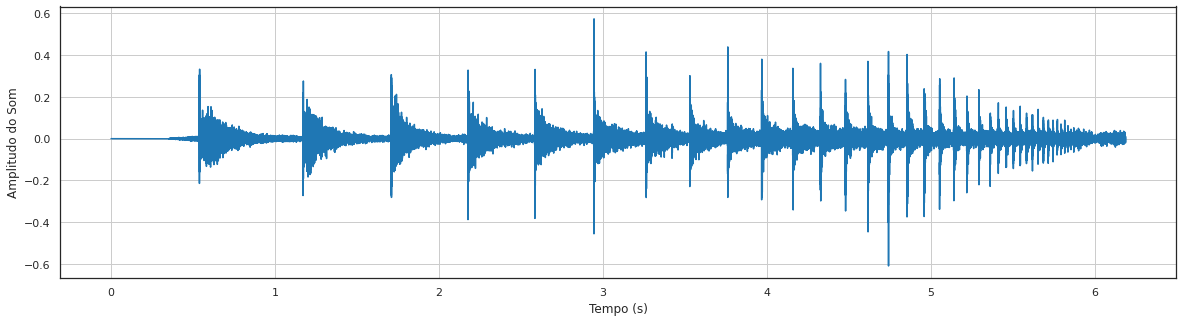

In [8]:
fig, ax = plt.subplots(figsize=(20,5))  #Caso queira mudar alterar de 20 para 500 
ax.grid()
# ax.xaxis.set_major_locator(MultipleLocator(0.01))   #Caso queira aumentar a resolução  remover comentario e acrescentar a linha e alterar para 500 a lnha 1
ax.plot(time, y)
ax.set(xlabel = 'Tempo (s)', ylabel = 'Amplitudo do Som')

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 267)

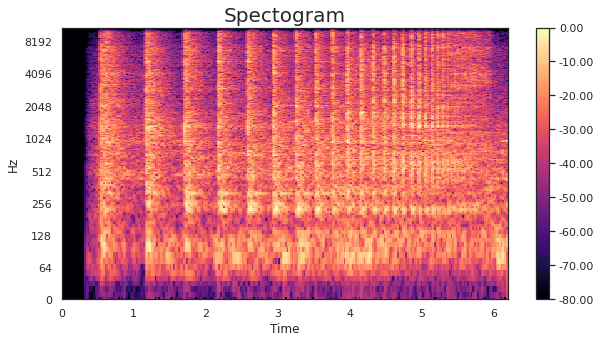

In [10]:

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [11]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

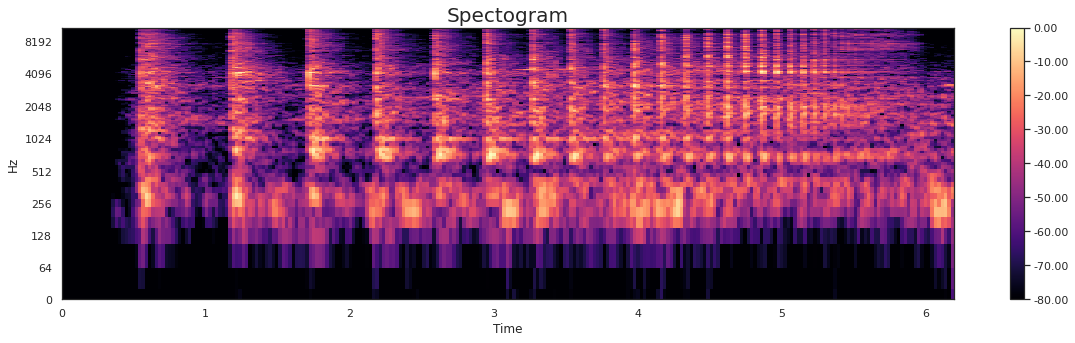

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))

img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()